### Handling imports

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Fetching Data

In [2]:
data = datasets.load_breast_cancer()

In [17]:
iris = datasets.load_iris()

### Splitting data

In [3]:
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target,random_state=1)

In [18]:
xtrain_iris,xtest_iris,ytrain_iris,ytest_iris = train_test_split(iris.data,iris.target,random_state=1)

### Using sklearn KNN

In [14]:
clf = KNeighborsClassifier()
clf.fit(xtrain,ytrain)

KNeighborsClassifier()

### Our Algorithm scored 93 percent on the testing data

In [15]:
clf.score(xtest,ytest)

0.9370629370629371

# cross_validation
see notes for theory in copy <br>
WE split the training data in k parts and train using k-1 parts and test on the k^th part <br>
this is done k times for all parts and then avg is taken

In [20]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier()
cross_val_score(clf,xtrain_iris,ytrain_iris)

array([0.95652174, 0.95652174, 0.95454545, 0.95454545, 0.86363636])

### Why 0 score ?
First we have imported cross val score and then K fold now  <br>
when we get the cross_ well score with the <b>number of splits</b> = 3  <br>
kFold(n_splits,shuffle,randome_state) <br>
we get 0  because  we are working upon the Iris data and there are only three outcomes in the Iris data  which means that the first 50 belongs to the first flower next 50  belongs to the next flower and the last 50 belongs to 3rd flower <br>
so when we are splitting in 3 <br>
Suppose 3 flowers are a , b and c <br>
Now when we split in 3 with no shuffle as default shuffle is false <br>
A and b pe train hota and c pe test <br>
A andc pe train hota and b pe test <br>
B and c pe train hota and a pe test<br>


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
clf = KNeighborsClassifier()
cross_val_score(clf,iris.data,iris.target,cv=KFold(3))

array([0., 0., 0.])

# choosing optimal k

see copy for chossing optimal k notes<br>
since default split is 3 we will get <b>3 scores </b> in score we are prinitng mean with the i which represents <b>no of neighbours </b> <br>

In [8]:
from sklearn.model_selection import cross_val_score
for i in range(1,20) :
    clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf,xtrain,ytrain)
    print(i,score.mean())

1 0.9132147742818058
2 0.9038303693570452
3 0.9178932968536252
4 0.9108344733242134
5 0.9179480164158689
6 0.9225991792065665
7 0.9225444596443229
8 0.9249247606019152
9 0.9272777017783858
10 0.9296306429548565
11 0.927277701778386
12 0.9296306429548565
13 0.9319835841313271
14 0.9273050615595076
15 0.927277701778386
16 0.927277701778386
17 0.9249521203830371
18 0.9249247606019153
19 0.9201915184678523


### plotting graph of no of neighbours (i)  and score for visualisation 
same thing printed above

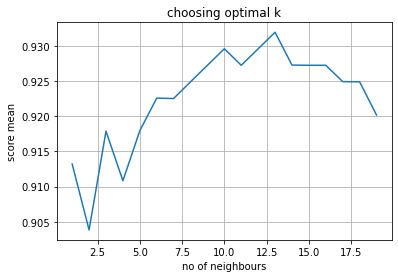

In [9]:
import matplotlib.pyplot as plt
x_axis = []
y_axis = []
for i in range(1,20) :
    clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf,xtrain,ytrain)
    x_axis.append(i)
    y_axis.append(score.mean())

plt.xlabel("no of neighbours")
plt.ylabel("score mean")
plt.title("choosing optimal k")
plt.grid()
plt.plot(x_axis,y_axis)
plt.show()
    